In [1]:
!gpu-who

/gnu/bin/bash: gpu-who: command not found


In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
from import_for_notebooks import *
torch.set_default_dtype(torch.float32)

import common_utils
import analysis
import analysis_utils
from analysis import find_nearest_neighbour, scale, sort_by_metric

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f12b51795a0>
Traceback (most recent call last):
  File "/dcs/pg22/u2291049/.conda/envs/reconstruction/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/dcs/pg22/u2291049/.conda/envs/reconstruction/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/dcs/pg22/u2291049/.conda/envs/reconstruction/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/dcs/pg22/u2291049/.conda/envs/reconstruction/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


IMPORTANT IMPORTED! 2023-09-18 02:43:07.084115
device=cpu


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f12aea99a20>
Traceback (most recent call last):
  File "/dcs/pg22/u2291049/.conda/envs/reconstruction/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/dcs/pg22/u2291049/.conda/envs/reconstruction/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/dcs/pg22/u2291049/.conda/envs/reconstruction/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/dcs/pg22/u2291049/.conda/envs/reconstruction/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


In [3]:
# in case you have your own sweep:
# sweep_id = '3s9e7mys'
# sweeps_dir = './data/sweeps/'
# sweep = analysis_utils.read_sweep(sweeps_dir, sweep_id, name=None, problem='cifar10_vehicles_animals')
# analysis_utils.download_sweep_results_from_wandb(sweep, max_runs_to_download=100)
# X = analysis_utils.get_all_reconstruction_outputs(sweep, verbose=True)

# read sweep parameters
sweep = common_utils.common.load_dict_to_obj("./reconstructions/cifar10_vehicles_animals/sweep.txt")
# read model, data, and whatever needed
args, Xtrn, Ytrn, ds_mean, W, model = analysis_utils.sweep_get_data_model(sweep, put_in_sweep=True, run_train_test=True)

Dataset_Reconstruction
OUTPUT_DIR: /dcs/large/u2291049/Dissertation/cnn/dataset_reconstruction/latestruns/2023_09_18_02_43_10_424417_cifar10_vehicles_animals_d250
Namespace(cuda=True, seed=1, proj_name='', precision='single', run_mode='reconstruct', pretrained_model_path='/dcs/large/u2291049/Dissertation/cnn/dataset_reconstruction/models/mlp/0dgwl25m.pth', train_save_model=True, train_save_model_every=-1, extract_save_results=True, extract_save_results_every=10000, save_args_files=True, wandb_active=False, wandb_project_name='Dataset_Reconstruction', wandb_entity='geetharanganathan', wandb_key='cff2550da0b6c88206b0172466e3c53cd1bdb9cd', problem='cifar10_vehicles_animals', data_per_class_train=250, data_per_class_val=0, data_per_class_test=1000, data_reduce_mean=True, metric='dssim', cls_type='bi', model_type='mlp', model_train_pooling='max', model_train_kernel=2, model_hidden_list=[1000, 1000], model_use_bias=False, use_init_scale=True, use_init_scale_only_first=True, model_init_list=[

In [4]:
# Read Reconstructed Data:

# "X" will contain a batch of all reconstructed samples (not all of them are good.. for this we need the rest of the cell)
# Here we put reconstructed data from two diffferent runs.
# you can use both of them or just one. (uncomment relevant parts)
x_paths = [
    # './reconstructions/cifar10_vehicles_animals/b9dfyspx_x.pth',
    # './reconstructions/cifar10_vehicles_animals/k60fvjdy_x.pth',
    # './runs/extraction-mlp-10k/x/3000_x.pth',
    # './runs/extraction-mlp-10k-ft2/x/0_x.pth',
    # './runs/extraction-mlp-10k-ft2/x/1000_x.pth',
    # './runs/extraction-mlp-10k-ft2/x/2000_x.pth',
    # './runs/extraction-mlp-10k-ft2/x/3000_x.pth',
    # './runs/extraction-mlp-10k-ft2/x/4000_x.pth',
    # './runs/extraction-mlp-10k-ft2/x/5000_x.pth',
    # './runs/extraction-mlp-10k-ft2/x/6000_x.pth',
    # './runs/extraction-mlp-10k-ft2/x/7000_x.pth',
    # './runs/extraction-mlp-10k-ft2/x/8000_x.pth',
    # './runs/extraction-mlp-10k-ft2/x/9000_x.pth',
    './wandb/old-runs/run-20230911_013713-j5kudmjr/files/x/49000_x.pth'
]
X = torch.load(x_paths[0],map_location=torch.device('cpu'))
# X = torch.load(x_paths[1])
# X = torch.cat([torch.load(x_paths[0],map_location=torch.device('cpu')), torch.load(x_paths[1],map_location=torch.device('cpu')),torch.load(x_paths[0],map_location=torch.device('cpu')),torch.load(x_paths[0],map_location=torch.device('cpu'))])

CUT the end of the zipped bla because it might have different shape before torch.cat
torch.Size([990, 3, 32, 32]) 66


  0%|          | 0/11 [00:00<?, ?it/s]

0 0 90


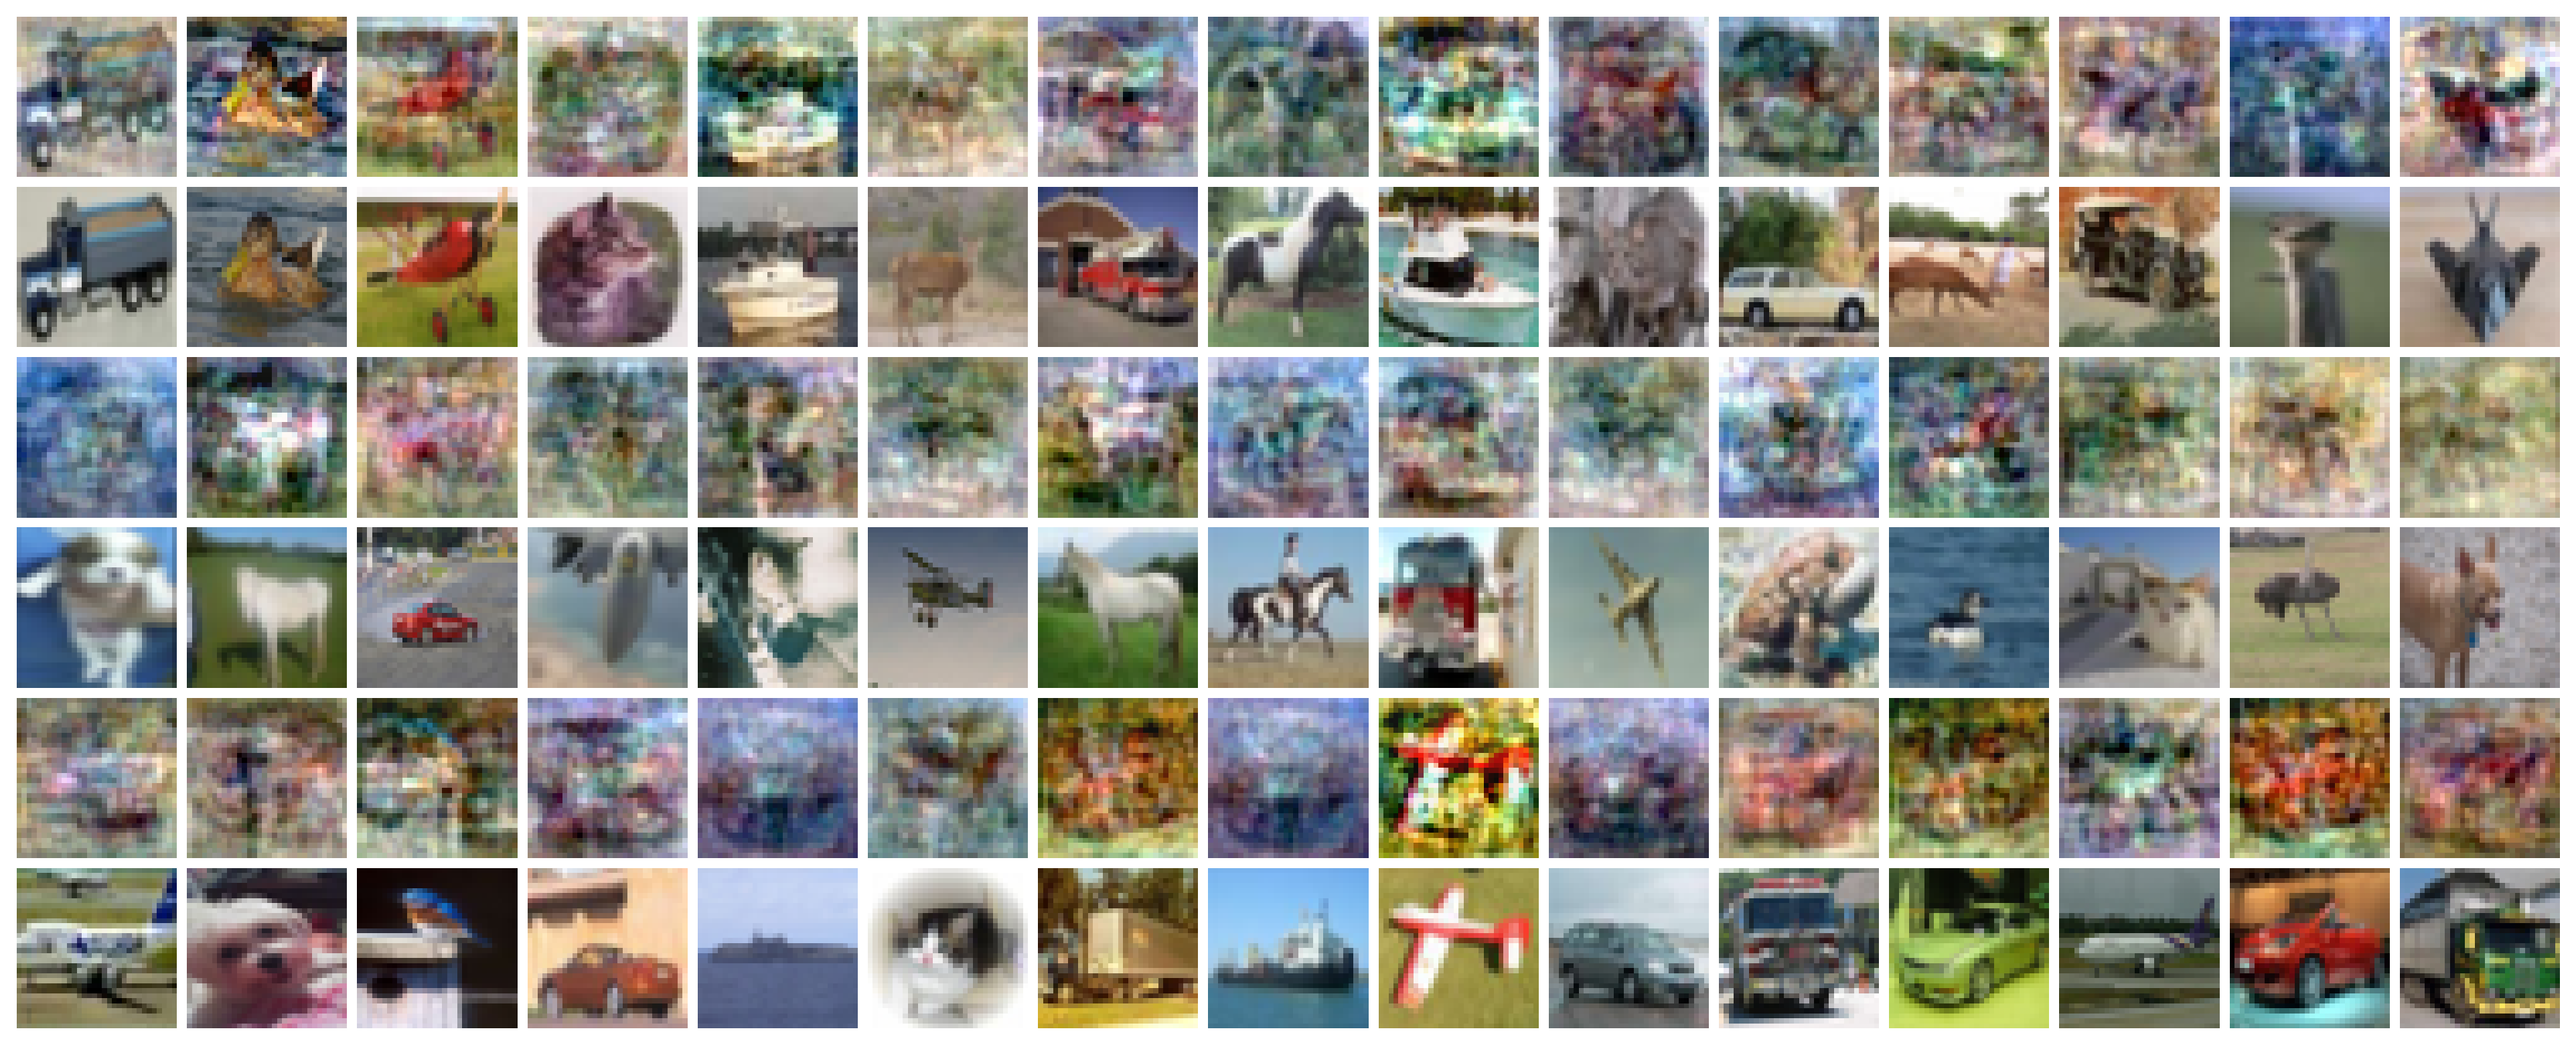

DONE!


In [11]:
# Find "Good" Resonctructions (as detailed in Appendix B.3):

# Find Nearest Neighbour
xx1 = find_nearest_neighbour(X, Xtrn, search='ncc2', vote='min', use_bb=False, nn_threshold=1000)
# Scale to Images
xx_scaled, yy_scaled = scale(xx1, Xtrn, ds_mean)
# # Sort
xx, yy, ssims, sort_idxs = sort_by_metric(xx_scaled, yy_scaled, sort='ssim')
values = model(Xtrn).data

# Plot
# color_by_labels = Ytrn[sort_idxs]
color_by_labels = None
figpath=None
analysis.plot_table(xx, yy, fig_elms_in_line=15, fig_lines_per_page=6, fig_type='one_above_another', color_by_labels=color_by_labels, figpath=figpath, show=True, dpi=100)